### Challenge

Do a little scraping or API-calling of your own.  Pick a new website and see what you can get out of it.  Expect that you'll run into bugs and blind alleys, and rely on your mentor to help you get through.  

Formally, your goal is to write a scraper that will:

1) Return specific pieces of information (rather than just downloading a whole page)  
2) Iterate over multiple pages/queries  
3) Save the data to your computer  

Once you have your data, compute some statistical summaries and/or visualizations that give you some new insights into your scraping topic of interest.  Write up a report from scraping code to summary and share it with your mentor.

#### Scraping with Scrapy

In [1]:
adding = True
increment = 0

while adding == True:
    try:
        df = pd.read_json('cl{}.json'.format(increment))
        increment += 1
    except:
        adding = False
    

import scrapy
from scrapy.crawler import CrawlerProcess


class CLSpider(scrapy.Spider):
    # Naming the spider is important if you are running more than one spider of
    # this class simultaneously.
    name = "CL"
    
    # URL(s) to start with.
    allowed_domains = ["atlanta.craigslist.org/"]
    start_urls = [
        'https://atlanta.craigslist.org/search/fua?sort=rel&query=desk',
    ]

    # Use XPath to parse the response we get.
    def parse(self, response):
        
        # Iterate over every <article> element on the page.
        for posting in response.xpath('//p[@class="result-info"]'):
            
            # Yield a dictionary with the values we want.
            yield {
                # This is the code to choose what we want to extract
                # You can modify this with other Xpath expressions to extract other information from the site
                'title': posting.xpath('a[@class="result-title hdrlnk"]/text()').extract_first(),
                'date': posting.xpath('time[@class="result-date"]/text()').extract_first(),
                'price': posting.xpath('span/span[@class="result-price"]/text()').extract_first(),
                'location': posting.xpath('span/span[@class="result-hood"]/text()').extract_first()
            }
        
        suffix = response.xpath('//a[@title="next page"]/@href').extract_first()
        print(suffix)
        next_page = response.urljoin(suffix)
        print(next_page)
        
        # Recursively calling the spider to process the next ten entries, if they exist.
        if next_page is not None:
            
            """next_page = '{}&lhcontinue={}'.format(self.start_urls[0],next_page)"""
            yield scrapy.Request(next_page, callback=self.parse)
        

# Tell the script how to run the crawler by passing in settings.
process = CrawlerProcess({
    'FEED_FORMAT': 'json',         # Store data in JSON format.
    'FEED_URI': 'cl{}.json'.format(increment),  # Name our storage file.
    'ROBOTSTXT_OBEY': True,
    'USER_AGENT': 'ThinkfulDataScienceBootcamp (thinkful.com)',
    'AUTOTHROTTLE_ENABLED': True,
    'HTTPCACHE_ENABLED': True,
    'LOG_ENABLED': False           # Turn off logging for now.
})

# Start the crawler with our spider.
process.crawl(CLSpider)
process.start()
print('\nCrawl Ended')

/search/fua?s=120&query=desk&sort=rel
https://atlanta.craigslist.org/search/fua?s=120&query=desk&sort=rel

Crawl Ended


#### Loading

In [2]:
import pandas as pd
import json
# read file
with open('cl0.json', 'r') as myfile:
    data=myfile.read()

# parse file
obj = json.loads(data)

In [3]:
df=pd.read_json(data)

#### Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
date        120 non-null object
location    102 non-null object
price       120 non-null object
title       120 non-null object
dtypes: object(4)
memory usage: 3.8+ KB


In [5]:
df

,date,location,price,title
0,Jun 25,(Buckhead),$100,Desk
1,Jun 25,(CONLEY),$250,LIKE NEW DESK
2,Jun 25,(54 Lumpkin Campground Rd),$1395,Antique Wooten Style walnut drop front w/ cubb...
3,Jun 25,(Alpharetta),$0,Early American RollTop Desk/Hutch
4,Jun 25,(Dunwoody),$260,Lexington Writing Desk with matching high back...
5,Jun 25,(Alpharetta),$300,Glass Top Desk
6,Jun 25,(Alpharetta),$495,curved Desk With Carved Detail
7,Jun 25,(Alpharetta),$0,1950's Italian Kidney Shaped Writing Desk
8,Jun 25,(Alpharetta),$195,Pottery Barn Desk & Chair
9,Jun 25,(Alpharetta),$825,Eastern European Old Pine Desk


In [6]:
df.isnull().sum()

date         0
location    18
price        0
title        0
dtype: int64

In [7]:
df.location=df.location.fillna('Atlanta')

In [8]:
df.isnull().sum()

date        0
location    0
price       0
title       0
dtype: int64

In [9]:
df.head()

,date,location,price,title
0,Jun 25,(Buckhead),$100,Desk
1,Jun 25,(CONLEY),$250,LIKE NEW DESK
2,Jun 25,(54 Lumpkin Campground Rd),$1395,Antique Wooten Style walnut drop front w/ cubb...
3,Jun 25,(Alpharetta),$0,Early American RollTop Desk/Hutch
4,Jun 25,(Dunwoody),$260,Lexington Writing Desk with matching high back...


In [10]:
df.dtypes

date        object
location    object
price       object
title       object
dtype: object

#### Cleaning

In [11]:
import re, os, sys
import requests
from sklearn.feature_extraction import text 

# Utility function for standard text cleaning.
def text_cleaner(text):
    text = re.sub("[][(){},.;!?<>%]", "", text)
    
    text = ' '.join(text.split())
    return text
round1= lambda x: text_cleaner(x)

In [12]:
df.location=df.location.apply(round1)
df.head(20)

,date,location,price,title
0,Jun 25,Buckhead,$100,Desk
1,Jun 25,CONLEY,$250,LIKE NEW DESK
2,Jun 25,54 Lumpkin Campground Rd,$1395,Antique Wooten Style walnut drop front w/ cubb...
3,Jun 25,Alpharetta,$0,Early American RollTop Desk/Hutch
4,Jun 25,Dunwoody,$260,Lexington Writing Desk with matching high back...
5,Jun 25,Alpharetta,$300,Glass Top Desk
6,Jun 25,Alpharetta,$495,curved Desk With Carved Detail
7,Jun 25,Alpharetta,$0,1950's Italian Kidney Shaped Writing Desk
8,Jun 25,Alpharetta,$195,Pottery Barn Desk & Chair
9,Jun 25,Alpharetta,$825,Eastern European Old Pine Desk


In [13]:
df.location=df.location.str.title()
df.head(20)

,date,location,price,title
0,Jun 25,Buckhead,$100,Desk
1,Jun 25,Conley,$250,LIKE NEW DESK
2,Jun 25,54 Lumpkin Campground Rd,$1395,Antique Wooten Style walnut drop front w/ cubb...
3,Jun 25,Alpharetta,$0,Early American RollTop Desk/Hutch
4,Jun 25,Dunwoody,$260,Lexington Writing Desk with matching high back...
5,Jun 25,Alpharetta,$300,Glass Top Desk
6,Jun 25,Alpharetta,$495,curved Desk With Carved Detail
7,Jun 25,Alpharetta,$0,1950's Italian Kidney Shaped Writing Desk
8,Jun 25,Alpharetta,$195,Pottery Barn Desk & Chair
9,Jun 25,Alpharetta,$825,Eastern European Old Pine Desk


In [14]:
df.location.unique()

array(['Buckhead', 'Conley', '54 Lumpkin Campground Rd', 'Alpharetta',
       'Dunwoody', 'Dunwoody Can Deliver Cash Or Paypal', 'Atlanta Itp',
       'Dunwoody Cash Or Paypal Can Deliver',
       'Antiques And Beyond A Select Group Shop', 'Norcross',
       'Stockbridge', 'Fayetteville', 'Roswell', 'Atlanta', 'Marietta',
       'Peachtree Corners', 'Johns Creek/South Forsyth Cy',
       'Peachtree City', 'Decatur', 'Mableton', 'Stone Mountain',
       'Pine Hills', 'Lawrenceville', 'Duluth', 'Woodstock',
       'Dunwody Can Deliver Cash Or Paypal', 'Oakwood',
       '4316 Mundy Milll Oakwood Ga', 'Midtown/Howell Mill', 'Chamblee',
       'Lilbutn', 'Decatur Atlanta Tucker', 'Woodstock Ga', 'Loganville',
       '1112 Breckenridge Ln', 'Cumming', 'Gwinnett Co', 'Monroe',
       'Covington', 'Sandy Springs', 'Cumming Ga', 'East Cobb',
       'Dunwoody Can Deliver', 'Atlanta Midtown', 'Ponce City Market',
       'Smyrna', 'Carrollton', 'Smyrna Vinings Marietta', 'Snellville',
       'Glen

In [15]:
# Utility function for standard text cleaning.
def text_cleaner(text):
    
    text = re.sub('Smyrna/Vinings', 'Smyrna',text)
    text = re.sub('Dunwody', 'Dunwoody',text)
    text = re.sub('Dunwoody Can Deliver Cash Or Paypal', 'Dunwoody',text)
    text = re.sub('Atlanta Ga', 'Atlanta',text)
    text = re.sub('Atlanta - Edgewood - Kirkwood - L5P', 'Atlanta',text)
    text = re.sub('Atlanta - Edgewood - L5P - Kirkwood', 'Atlanta',text)
    text = re.sub('4316 Mundy Milll Oakwood Ga', 'Oakwood',text)
    text = re.sub('Alpharetta/Cumming/Milton', 'Alpharetta',text)
    text = re.sub('Smyrna Vinings Marietta', 'Smyrna',text)
    text = re.sub('Glenridge Connector', 'Sandy Springs',text)
    text = re.sub('Alpharetta McFarland Rd', 'Alpharetta',text)
    text = re.sub('Lawerenceville', 'Lawrenceville',text)
    text = re.sub('Decatur Atlanta Tucker', 'Decatur',text)
    text = re.sub('Atlanta Midtown', 'Atlanta',text)
    text = re.sub('1112 Breckenridge Ln', 'Alpharetta',text)
    text = re.sub('Virginia Highlands', 'Atlanta',text)
    text = re.sub('Ponce City Market', 'Atlanta',text)
    text = re.sub('54 Lumpkin Campground Rd', 'Dawsonville',text)
    text = re.sub('Atlanta Itp', 'Atlanta',text)
    


    
    text = ' '.join(text.split())
    return text
round2= lambda x: text_cleaner(x)

In [16]:
df.location=df.location.apply(round2)
df.head(20)

,date,location,price,title
0,Jun 25,Buckhead,$100,Desk
1,Jun 25,Conley,$250,LIKE NEW DESK
2,Jun 25,Dawsonville,$1395,Antique Wooten Style walnut drop front w/ cubb...
3,Jun 25,Alpharetta,$0,Early American RollTop Desk/Hutch
4,Jun 25,Dunwoody,$260,Lexington Writing Desk with matching high back...
5,Jun 25,Alpharetta,$300,Glass Top Desk
6,Jun 25,Alpharetta,$495,curved Desk With Carved Detail
7,Jun 25,Alpharetta,$0,1950's Italian Kidney Shaped Writing Desk
8,Jun 25,Alpharetta,$195,Pottery Barn Desk & Chair
9,Jun 25,Alpharetta,$825,Eastern European Old Pine Desk


In [17]:
df.location.unique()

array(['Buckhead', 'Conley', 'Dawsonville', 'Alpharetta', 'Dunwoody',
       'Atlanta', 'Dunwoody Cash Or Paypal Can Deliver',
       'Antiques And Beyond A Select Group Shop', 'Norcross',
       'Stockbridge', 'Fayetteville', 'Roswell', 'Marietta',
       'Peachtree Corners', 'Johns Creek/South Forsyth Cy',
       'Peachtree City', 'Decatur', 'Mableton', 'Stone Mountain',
       'Pine Hills', 'Lawrenceville', 'Duluth', 'Woodstock', 'Oakwood',
       'Midtown/Howell Mill', 'Chamblee', 'Lilbutn', 'Woodstock Ga',
       'Loganville', 'Cumming', 'Gwinnett Co', 'Monroe', 'Covington',
       'Sandy Springs', 'Cumming Ga', 'East Cobb', 'Dunwoody Can Deliver',
       'Smyrna', 'Carrollton', 'Snellville', 'Canton'], dtype=object)

In [20]:
# Utility function for standard text cleaning.
def text_cleaner(text):
    text = re.sub('Woodstock Ga', 'Woodstock',text)
    text = re.sub('Buckhead', 'Atlanta',text)
    text = re.sub('Dunwoody Can Deliver', 'Dunwoody',text)
    text = re.sub('Alpharetta/Cumming', 'Alpharetta',text)
    text = re.sub('Cumming Ga', 'Cumming',text)
    text = re.sub('Alpharetta Mcfarland Rd', 'Alpharetta',text)
    text = re.sub('Atlanta - Edgewood - Kirkwood', 'Atlanta',text)
    text = re.sub('Midtown/Howell Mill', 'Atlanta',text)
    text = re.sub('Lilbutn', 'Lilburn',text)
    text = re.sub('Antiques And Beyond A Select Group Shop', 'Atlanta',text)
    text = re.sub('Johns Creek/South Forsyth Cy', 'Johns Creek',text)
    text = re.sub('Midtown/Howell Mill', 'Atlanta',text)
    text = re.sub('Midtown/Howell Mill', 'Atlanta',text)
    text = re.sub('Dunwoody Cash Or Paypal Can Deliver', 'Dunwoody',text)

    text = ' '.join(text.split())
    return text
round3= lambda x: text_cleaner(x)

In [24]:
df.location=df.location.apply(round2)
df.location.unique()

array(['Atlanta', 'Conley', 'Dawsonville', 'Alpharetta', 'Dunwoody',
       'Norcross', 'Stockbridge', 'Fayetteville', 'Roswell', 'Marietta',
       'Peachtree Corners', 'Johns Creek', 'Peachtree City', 'Decatur',
       'Mableton', 'Stone Mountain', 'Pine Hills', 'Lawrenceville',
       'Duluth', 'Woodstock', 'Oakwood', 'Chamblee', 'Lilburn',
       'Loganville', 'Cumming', 'Gwinnett Co', 'Monroe', 'Covington',
       'Sandy Springs', 'East Cobb', 'Smyrna', 'Carrollton', 'Snellville',
       'Canton'], dtype=object)

In [25]:
#remove $ signs and convert to float
df.price = df.price.map(lambda x: None if x == None else int(re.sub('\$', '', str(x))))
df.head()

,date,location,price,title
0,Jun 25,Atlanta,100,Desk
1,Jun 25,Conley,250,LIKE NEW DESK
2,Jun 25,Dawsonville,1395,Antique Wooten Style walnut drop front w/ cubb...
3,Jun 25,Alpharetta,0,Early American RollTop Desk/Hutch
4,Jun 25,Dunwoody,260,Lexington Writing Desk with matching high back...


In [26]:
df.dtypes

date        object
location    object
price        int64
title       object
dtype: object

In [27]:
import numpy as np
df.price=df.price.replace(0, np.nan)
df.head()

,date,location,price,title
0,Jun 25,Atlanta,100.0,Desk
1,Jun 25,Conley,250.0,LIKE NEW DESK
2,Jun 25,Dawsonville,1395.0,Antique Wooten Style walnut drop front w/ cubb...
3,Jun 25,Alpharetta,NaN,Early American RollTop Desk/Hutch
4,Jun 25,Dunwoody,260.0,Lexington Writing Desk with matching high back...


In [28]:
df = df.dropna()
df.head()

,date,location,price,title
0,Jun 25,Atlanta,100.0,Desk
1,Jun 25,Conley,250.0,LIKE NEW DESK
2,Jun 25,Dawsonville,1395.0,Antique Wooten Style walnut drop front w/ cubb...
4,Jun 25,Dunwoody,260.0,Lexington Writing Desk with matching high back...
5,Jun 25,Alpharetta,300.0,Glass Top Desk


In [29]:
#justincase
import pickle
df.to_pickle("dfscrapy.pkl")

In [30]:
#average prices
mindeskprice =df.price.min()
maxdeskprice =df.price.max()
avgdeskprice = df.price.mean()

print('Miniumum Desk Price',mindeskprice )
print("Max Desk Price",maxdeskprice )
print("Average desk pricec", avgdeskprice)

Miniumum Desk Price 15.0
Max Desk Price 2495.0
Average desk pricec 299.64864864864865


#### Visualizations

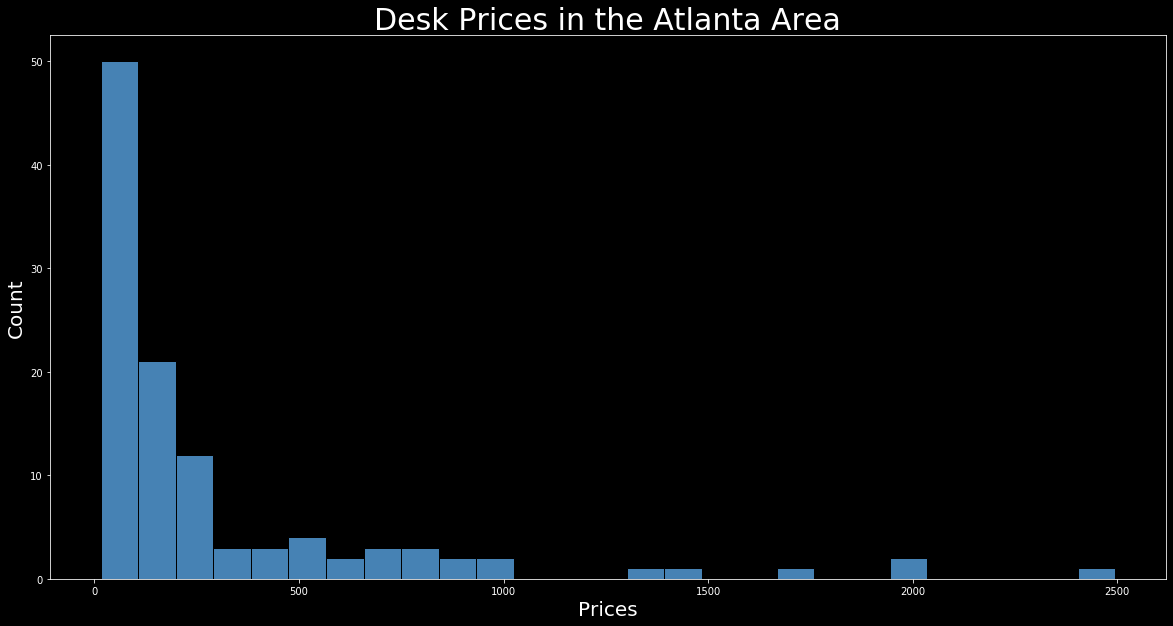

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = 20, 10
plt.hist(df.price, color = 'steelblue', edgecolor = 'black',  bins=27)
plt.xlabel('Prices',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Desk Prices in the Atlanta Area',fontsize=30)
plt.show()

Text(0.5, 1.0, 'Prices by Location')

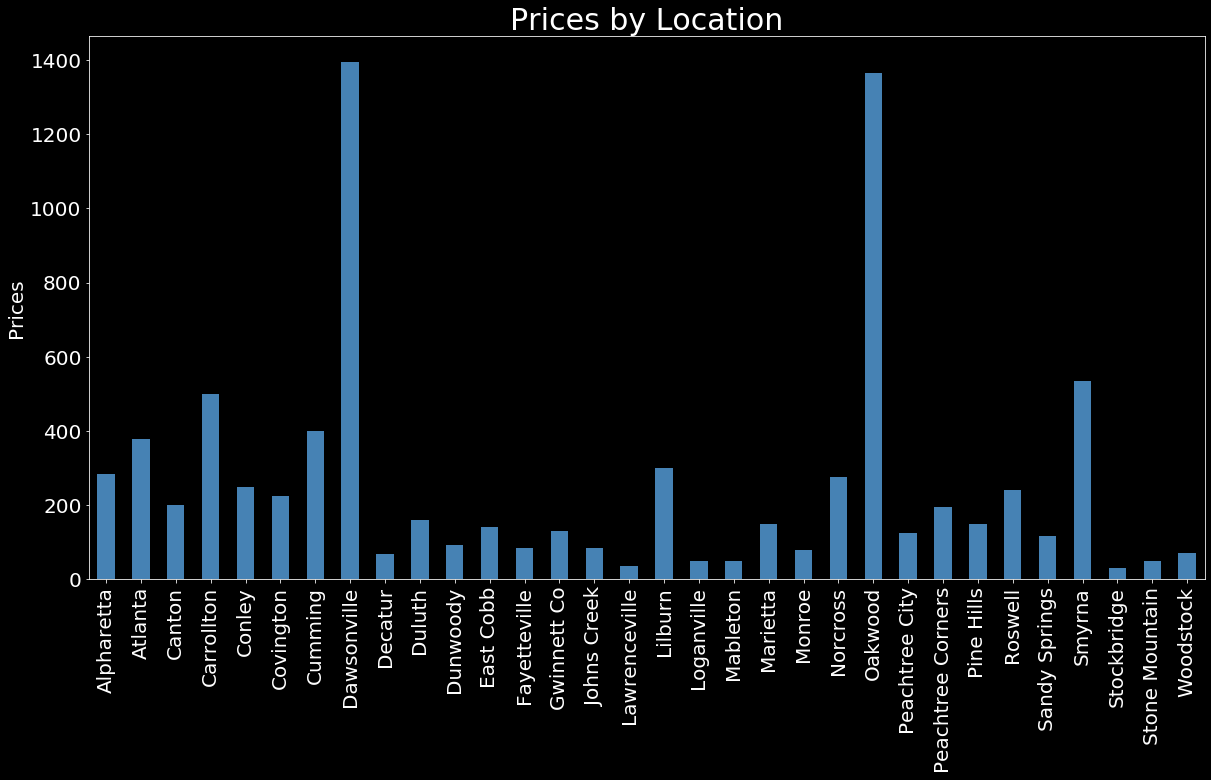

In [95]:
df.groupby(["location"])['price'].mean().plot(kind='bar', color = 'steelblue')
plt.rcParams['figure.figsize'] = 20, 10
plt.tick_params(labelsize=20)
plt.ylabel('Prices',fontsize=20)
plt.xlabel('')
plt.title('Prices by Location',fontsize=30)

The highest prices for desks are in areas such as Dawsonville and Oakwood. Most desks do not cose over 400. The majority seem to be around $200 which matches the mean summary above. 

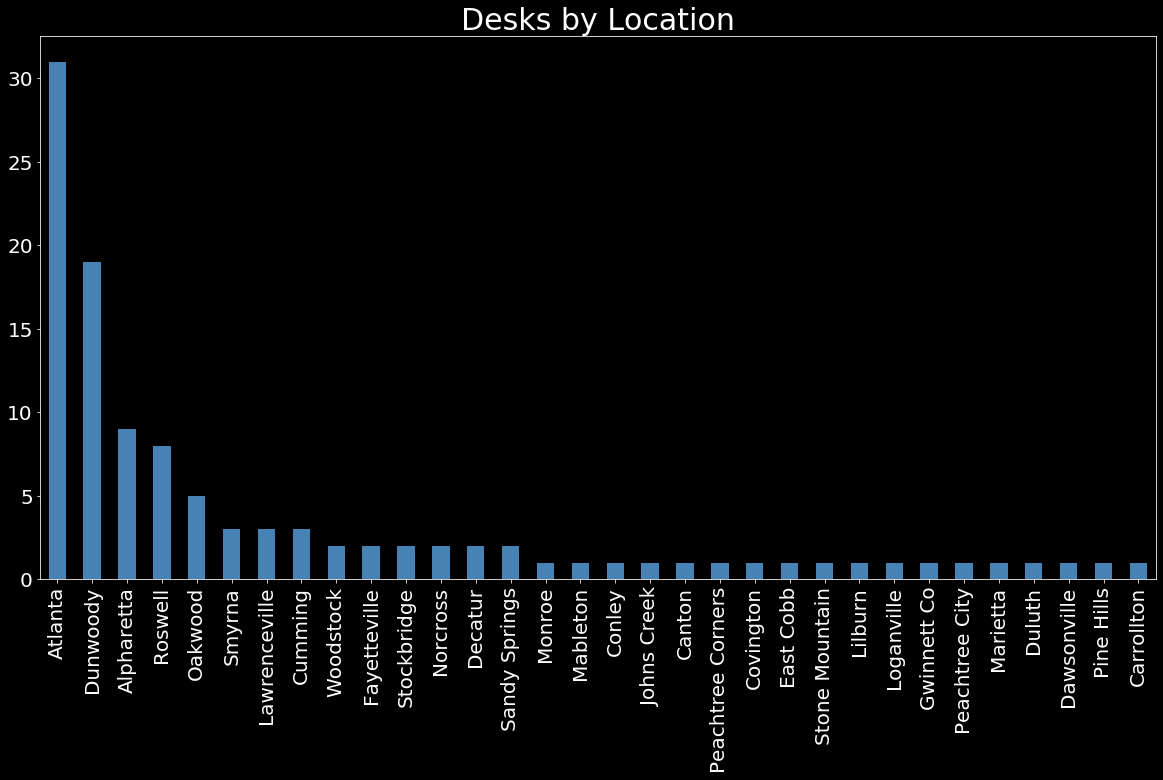

In [121]:
df.location.value_counts().plot(kind='bar', color = 'steelblue')
plt.rcParams['figure.figsize'] = 20, 10
plt.tick_params(labelsize=20)
plt.ylabel('')
plt.xlabel('')
plt.title('Desks by Location',fontsize=30)

plt.show()

The moajority of desks are in Atlanta (or ATL metro) which makes sense because of the domain and general size of Atlanta. Other areas included Dunwoody, Alpharetta, and Roswell.  A lot of other places only averages 1 desk. 

If you wanted a variety of desks to choose from at a reasable price, your best choices in the Atlanta area would be locations such as Atlanta or Alpharetta.